## 1 Packages

In [1]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## 2 Explore Data

In [5]:
Classified=pd.read_csv('KNN_Project_Data')

In [7]:
Classified.head(5)
    # All data is numerical

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


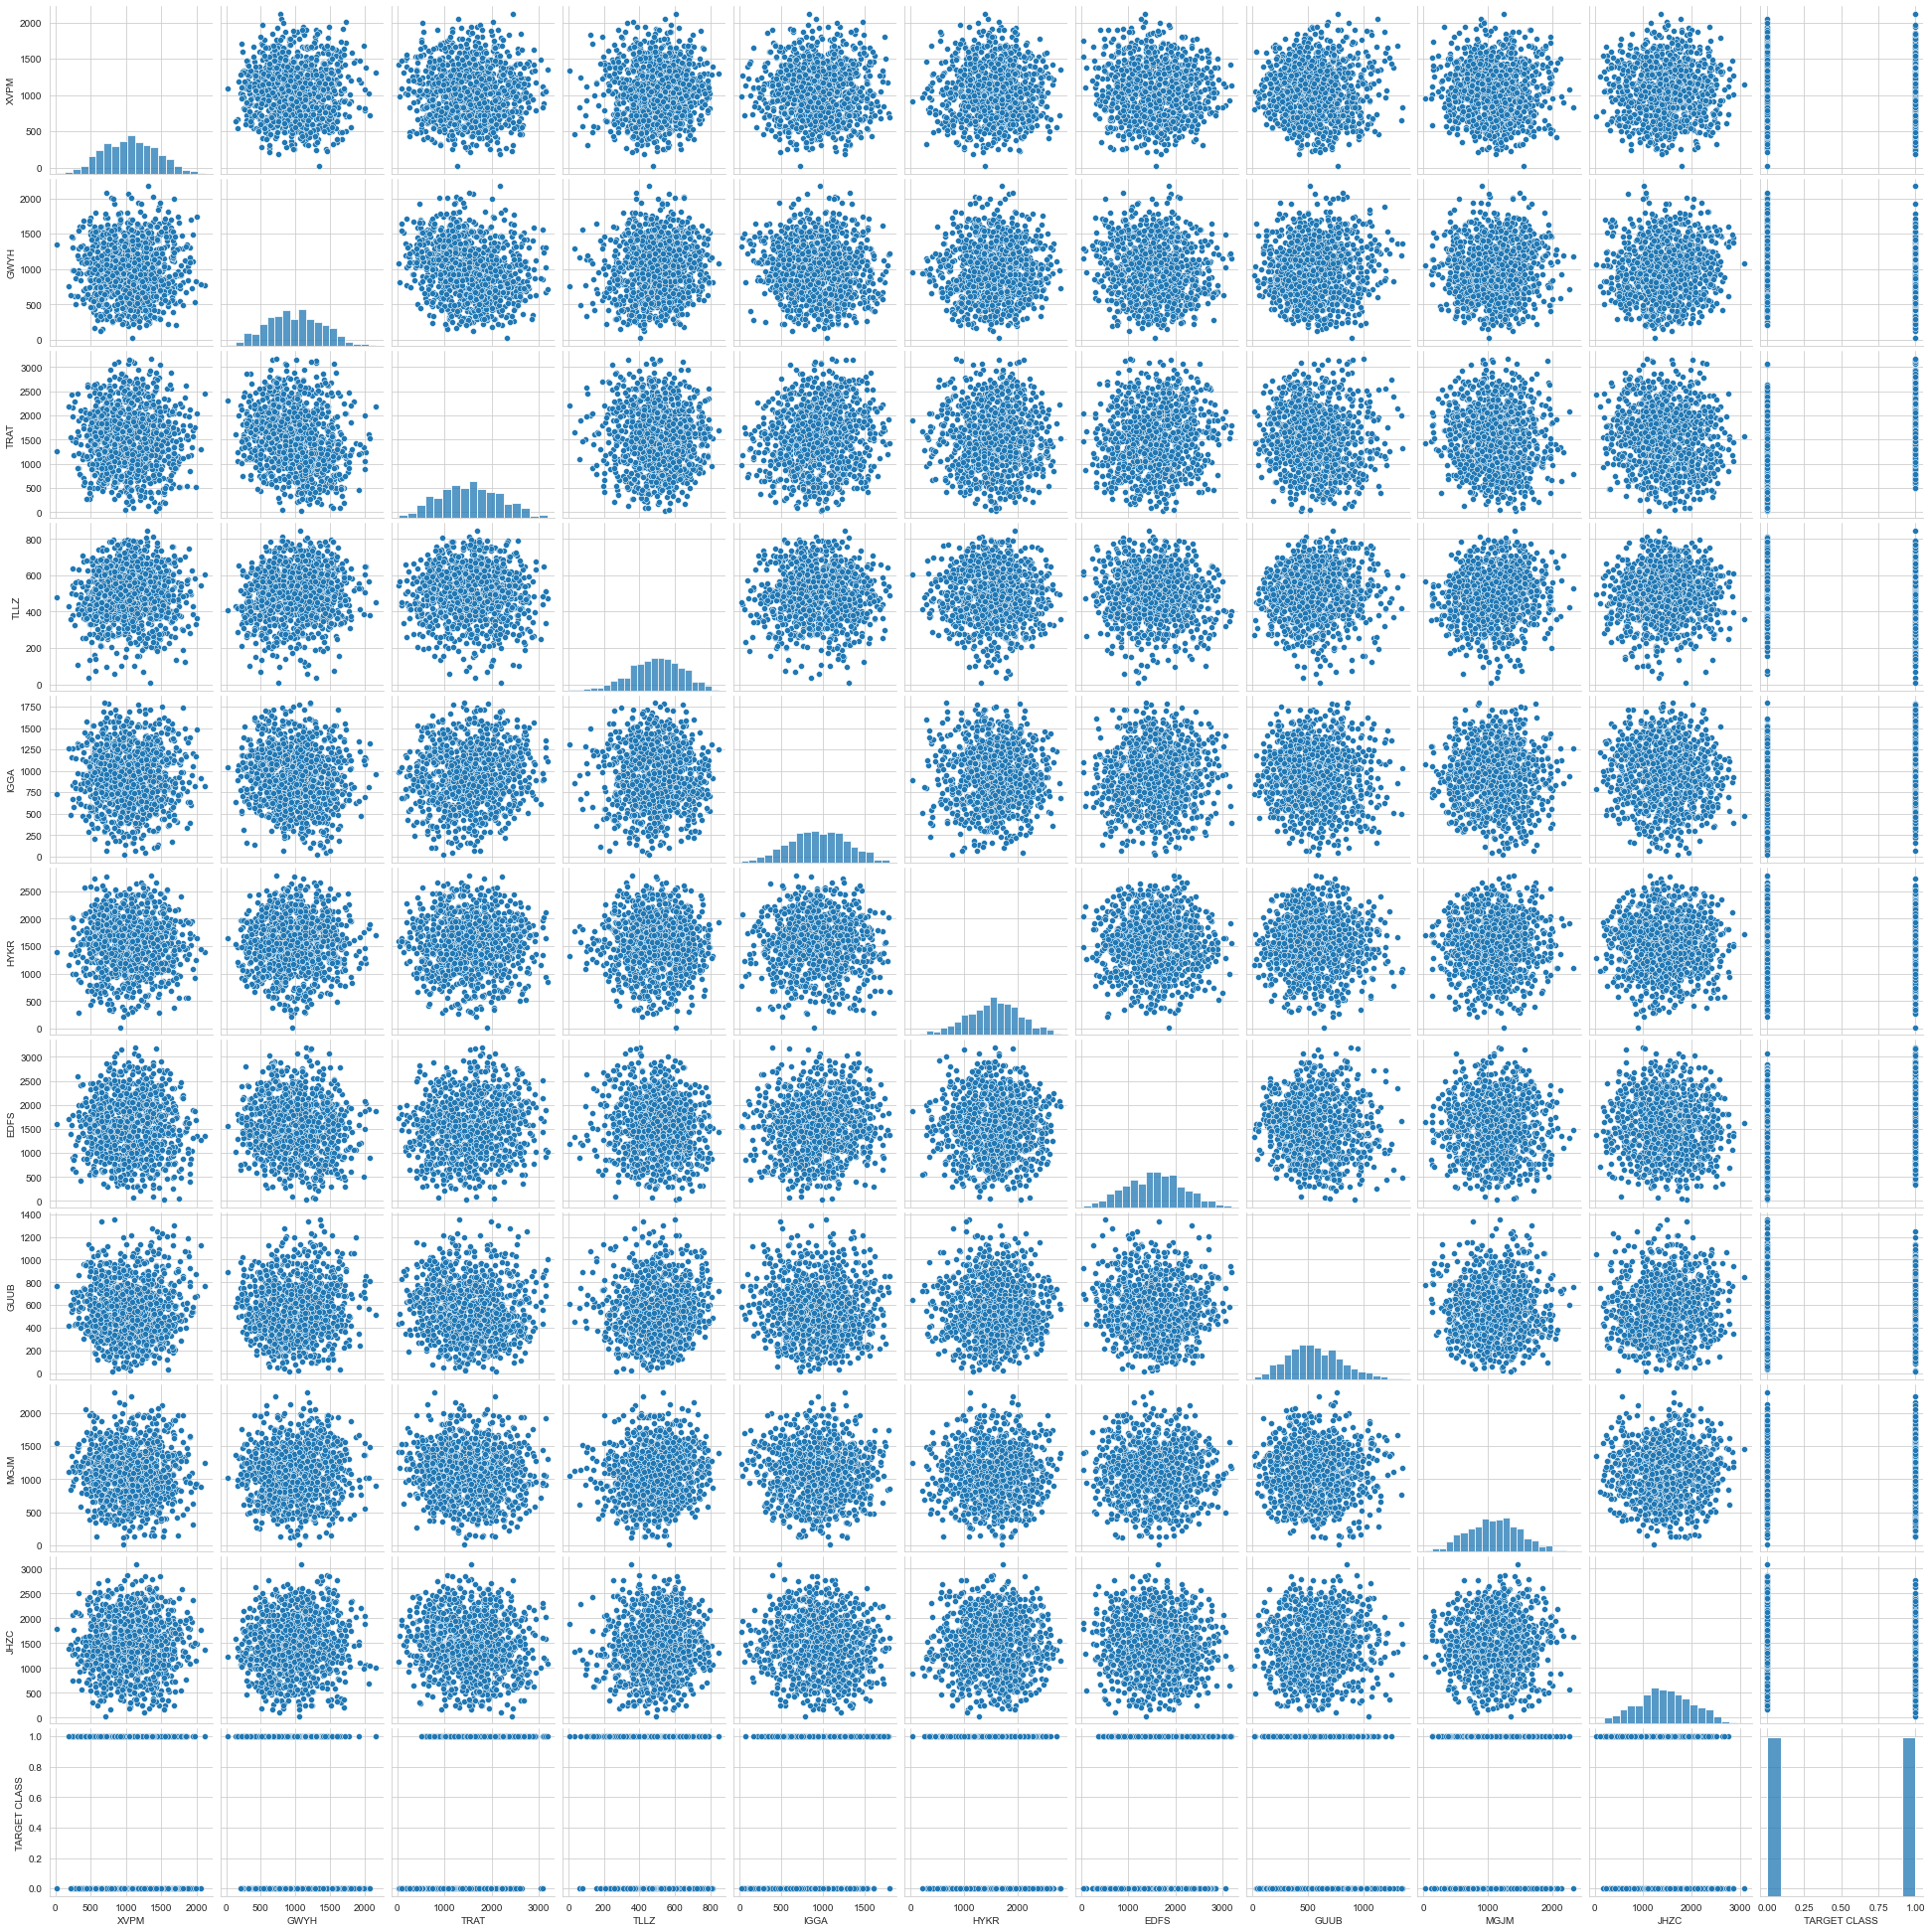

In [8]:
sns.pairplot(Classified)

<AxesSubplot:xlabel='TARGET CLASS', ylabel='count'>

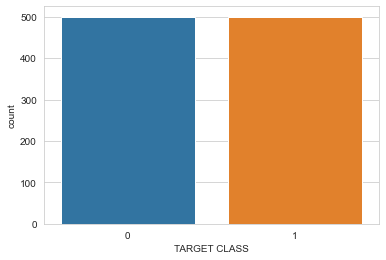

In [9]:
sns.countplot(x=Classified['TARGET CLASS'])
    # Both classes are equeal

## 3 Preprocessing

## 3.1 Split Data

In [14]:
X=Classified.drop('TARGET CLASS',axis=1)
y=Classified['TARGET CLASS']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 3.2 Scalling
   - Here I will use scalling to be able to use KNN (The algorithm calculates the distance)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [17]:
scaler.fit(X_train,y_train)

StandardScaler()

In [18]:
X_train=scaler.transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

## 4 Training

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
KNN_model=KNeighborsClassifier(n_neighbors=1)

In [31]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## 5 Prediction

In [32]:
y_pred=KNN_model.predict(X_test)

## 6 Evaluation

In [33]:
from sklearn. metrics import classification_report,confusion_matrix,explained_variance_score

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       152
           1       0.72      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [35]:
print(confusion_matrix(y_test,y_pred))

[[110  42]
 [ 41 107]]


In [36]:
print(explained_variance_score(y_test,y_pred))

-0.10681899004267392


## 7 Use Elbow Method

In [29]:
from sklearn.metrics import mean_absolute_error

In [38]:
Error_rate=[]
for i in range(1,40):
    KNN_model=KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train,y_train)
    y_pred=KNN_model.predict(X_test)
    error=mean_absolute_error(y_test,y_pred)
    Error_rate.append(error)

Text(0, 0.5, 'Error Rate')

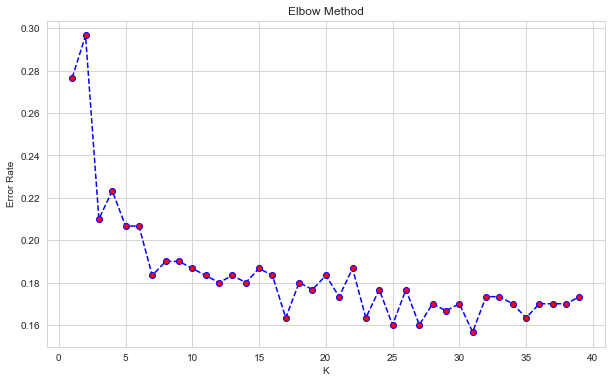

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),Error_rate,color='blue',marker='o',linestyle='dashed',markerfacecolor='red')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Error Rate')

## 8 Use new K

In [42]:
KNN_model=KNeighborsClassifier(n_neighbors=23)
KNN_model.fit(X_train,y_train)
y_pred=KNN_model.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [44]:
print(confusion_matrix(y_test,y_pred))

[[124  28]
 [ 21 127]]


In [45]:
print(explained_variance_score(y_test,y_pred))

0.34872866287339976


## 9 Analysis

- Using k=23 improved precision, recall, and f1 score